In [1]:
#Import dependencies
import pandas as pd
import random
import requests as req
import json
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy as cp
import time

In [2]:
#Access API
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [3]:
#Use citipy to build list of city names and latitude/longitude
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

In [4]:
#Look at index names
print(citylist[0])

{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [5]:
#Start Dataframe and pull 500 random cities
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
    'latitude': [x['lat'] for x in citylist],
    'longitude': [x['long'] for x in citylist]
})

samplecity = citypd.sample(500)

In [7]:
#Print data
samplecity

,city,country,latitude,longitude
7431,avinurme,ee,59,27
542,lima,py,-24,-56
7803,a,no,65,10
688,okakarara,na,-21,17
1096,santa ana,pe,-13,-73
7078,taksimo,ru,55,115
342,gravatai,br,-30,-51
3624,juarez,mx,25,-104
6209,saint-ambroise,ca,49,-71
6516,alekseyevka,kz,51,70


In [8]:
#Make API calls w/ print logwith city number/name/URL
apikey = api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#         print(cityweather)
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"City number: {count}")
    print(f"City name: {row['city']}" )
    print(f"Requested URL: {query_url}")

City number: 1
City name: avinurme
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=avinurme
City number: 2
City name: lima
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lima
No data for this city: a
City number: 3
City name: a
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=a
City number: 4
City name: okakarara
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=okakarara
City number: 5
City name: santa ana
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=santa ana
City number: 6
City name: taksimo
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=taksimo
City number: 7
City nam

City number: 50
City name: jagtial
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=jagtial
City number: 51
City name: chandil
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=chandil
City number: 52
City name: andrushivka
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=andrushivka
City number: 53
City name: hailar
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hailar
City number: 54
City name: bilma
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bilma
City number: 55
City name: caramoran
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=caramoran
City number: 56
City name: p

City number: 100
City name: changping
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=changping
City number: 101
City name: flin flon
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=flin flon
City number: 102
City name: ylivieska
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ylivieska
City number: 103
City name: chornukhy
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=chornukhy
City number: 104
City name: moerai
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=moerai
City number: 105
City name: lourdes
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lourdes
City number: 1

City number: 149
City name: ipixuna
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ipixuna
City number: 150
City name: cusuna
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=cusuna
City number: 151
City name: banyo
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=banyo
City number: 152
City name: ibipeba
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ibipeba
City number: 153
City name: mangan
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mangan
No data for this city: opobo
City number: 154
City name: opobo
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=opobo
City number

City number: 200
City name: mokrousovo
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mokrousovo
No data for this city: bolshegrivskoye
City number: 201
City name: bolshegrivskoye
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bolshegrivskoye
City number: 202
City name: gondar
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=gondar
City number: 203
City name: stavropol
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=stavropol
City number: 204
City name: sao sebastiao
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sao sebastiao
City number: 205
City name: snihurivka
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1

City number: 249
City name: manacapuru
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=manacapuru
City number: 250
City name: castro
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=castro
City number: 251
City name: rostovka
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=rostovka
City number: 252
City name: derbent
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=derbent
City number: 253
City name: papayal
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=papayal
City number: 254
City name: palivere
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=palivere
City number: 255
Cit

City number: 298
City name: bhandara
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bhandara
City number: 299
City name: kangasala
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kangasala
City number: 300
City name: edea
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=edea
City number: 301
City name: karuzi
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=karuzi
City number: 302
City name: mandurah
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mandurah
City number: 303
City name: acacias
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=acacias
No data for this city: marat

City number: 348
City name: libenge
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=libenge
City number: 349
City name: los zacatones
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=los zacatones
City number: 350
City name: koson
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=koson
City number: 351
City name: tunceli
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tunceli
City number: 352
City name: darbhanga
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=darbhanga
City number: 353
City name: amambai
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=amambai
City number: 354

City number: 398
City name: peceneaga
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=peceneaga
City number: 399
City name: yankton
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=yankton
City number: 400
City name: killarney
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=killarney
City number: 401
City name: wahpeton
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=wahpeton
City number: 402
City name: lake havasu city
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lake havasu city
City number: 403
City name: puksoozero
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=pukso

City number: 448
City name: lively
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lively
City number: 449
City name: margherita
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=margherita
No data for this city: wolmaranstad
City number: 450
City name: wolmaranstad
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=wolmaranstad
City number: 451
City name: ahtopol
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ahtopol
City number: 452
City name: lewisporte
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lewisporte
City number: 453
City name: providencia
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b

City number: 498
City name: mujiayingzi
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mujiayingzi
City number: 499
City name: muborak
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=muborak
City number: 500
City name: millinocket
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=millinocket


In [15]:
#Drop results into dataframe
samplecity = samplecity[samplecity.city != ""]
samplecity

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
7431,avinurme,ee,58,58,10,68,0,2
542,lima,py,-12,-12,66,82,56,2
688,okakarara,na,-20,-20,65,79,64,3
1096,santa ana,pe,13,13,90,31,75,5
7078,taksimo,ru,56,56,9,75,56,1
342,gravatai,br,-29,-29,85,70,20,4
3624,juarez,mx,-38,-38,75,22,20,18
6209,saint-ambroise,ca,47,47,44,93,92,11
6516,alekseyevka,kz,53,53,26,68,0,13
4022,pitiquito,mx,30,30,86,20,8,8


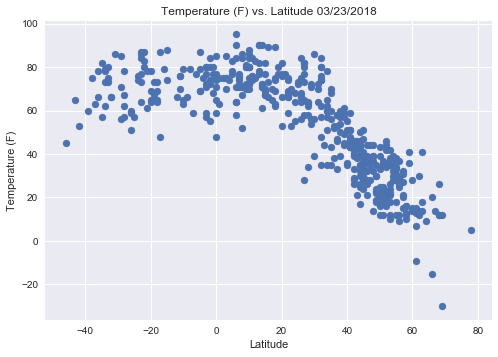

In [19]:
#Plot temp vs. latitude using Seaborn
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(samplecity['latitude'],samplecity['temperature'])
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('seaborn')
plt.savefig("Temperature.png")
plt.show()

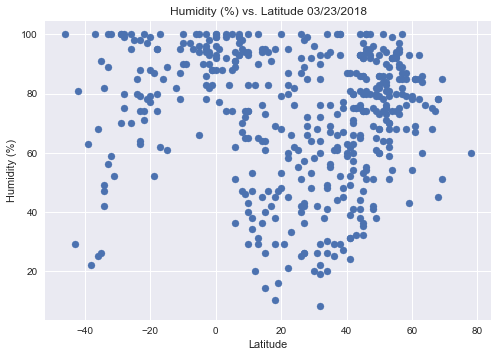

In [20]:
#Plot humidity vs. latitude 
plt.scatter(samplecity['latitude'], samplecity['humidity'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('seaborn')
plt.savefig("Humidity.png")
plt.show()

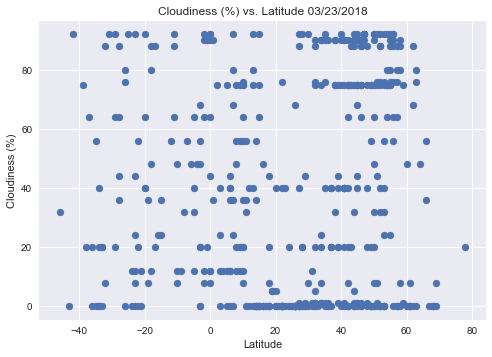

In [21]:
#Plot cloudiness vs. latitude
plt.scatter(samplecity['latitude'], samplecity['cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('seaborn')
plt.savefig("Cloudiness.png")
plt.show()

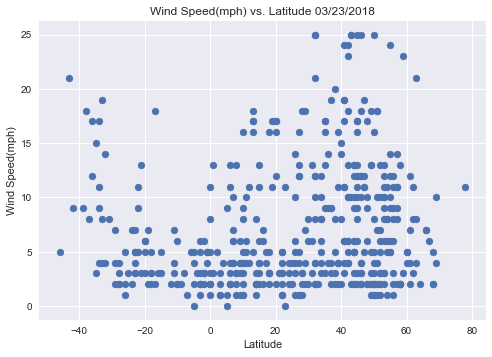

In [22]:
#Plot wind speed vs. latitude
plt.scatter(samplecity['latitude'], samplecity['wind_speed'])
plt.title(f"Wind Speed(mph) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('seaborn')
plt.savefig("Wind_Speed.png")
plt.show()

In [57]:
samplecity.to_csv("sampleweather.csv", encoding="utf-8", index=False)
df = pd.read_csv("sampleweather.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,presidente venceslau,br,-21,-21,82,58,40,3
1,pyinmana,mm,19,19,68,57,0,5
2,nkayi,cg,-4,-4,77,84,0,3
3,punalur,in,9,9,82,83,20,8
4,gemena,cd,3,3,73,93,8,2


# Observable Trends

-  I observed heavy plots of 0% cloudiness between the 20 and 60 latitude ticks. With some research, I found that most major deserts are located between 30 and 50 degrees latitude. These areas experience global patterns of high-pressure systems that drive away clouds and rain.

     *See info on the Hadley cell and the Ferrel cell for more info. Pretty cool.
      https://en.wikipedia.org/wiki/Hadley_cell



-  Temperatures by latitude are pretty consistent with climate zone maps and average temperatures. Northern and Southern latitudes mirror each other until around 40 degrees North when you enter the Temperate Zone. This skew is likely due to the number of cities in the northern hemisphere vs. the southern (and the data set is measuring city data). There are also a lot more cities above 60 degrees north than below -60 south to provide that temperature data.



- It appears that wind speeds are highest in areas between 30 and 50 degrees north. This could be due to prevailing westerlies which fall in the middle latitudes (35-65), and blow from west to east in high pressure areas.